# What are Light Curves?

`LightCurve` objects are data objects which encapsulate the brightness of a star over time. They provide a series of common operations, for example folding, binning, plotting etc. There are a range of subclasses of `LightCurve` objects specific to telescopes, including `KeplerLightCurve` for Kepler and K2 data and `TessLightCurve` for TESS data.

Althought `lightkurve` was designed with Kepler, K2 and TESS in mind, these objects can be used for a range of astronomy data.

You can create a `LightCurve` object from a `TargetPixelFile` object using Simple Aperture Photometry (see our tutorial for more information on Target Pixel Files [here](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html) This allows you to control the size and shape of the pixel aperture that creates your lightcurve. You can avoid nearby contaminants or increase/decrease the aperture size, depending on your science needs.

To demonstrate, lets create a `KeplerLightCurve` from a `KeplerTargetPixelFile`.

In [1]:
from lightkurve import KeplerTargetPixelFile, KeplerLightCurve
#First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = KeplerTargetPixelFile.from_archive(6922244, quarter=4)

#Then we convert the target pixel file into a light curve.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

INFO: Found cached file ./mastDownload/Kepler/kplr006922244_lc_Q111111111111111111/kplr006922244-2010078095331_lpd-targ.fits.gz with expected size 2009425. [astroquery.query]


We've built a new `KeplerLightCurve` object called 'lc'. Note in this case we've passed an **aperture** to the `to_lightcurve` method. The default is to use the *Kepler* pipeline aperture. (You can pass your own aperture, which is a boolean `numpy` array.) By summing all the pixels in the aperture we have created a Simple Aperture Photometry (SAP) lightcurve.

`KeplerLightCurve` has many useful functions that you can use. As with Target Pixel Files you can access the meta data very simply:

In [2]:
lc.mission

'Kepler'

In [3]:
lc.quarter

4

And you still have access to time and flux attributes. In a light curve, there is only one flux point for every time stamp:

In [4]:
lc.time, lc.flux

(array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
        442.18306983, 442.2035041 ]),
 array([43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
        43151.562], dtype=float32))

You can also check the CDPP of the lightcurve using the built in method:

In [5]:
lc.cdpp()

407.3551972396672

Now we can use the built in `plot` function on the `KeplerLightCurve` object to plot the time series. You can pass `plot` any keywords you would normally pass to `matplotlib.pyplot.plot`.

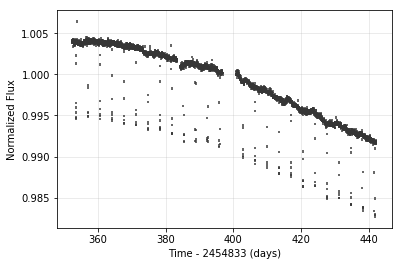

In [6]:
lc.plot();

There are a set of useful functions in `LightCurve` objects which you can use to manipulate the data. These include:
* `flatten`: Remove long term trends using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)
* `remove_outliers`: Remove outliers using simple sigma clipping
* `remove_nans`: Remove infinite or NaN values (these can occur during thruster firings)
* `fold`: Fold the data at a particular period
* `bin`: Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object

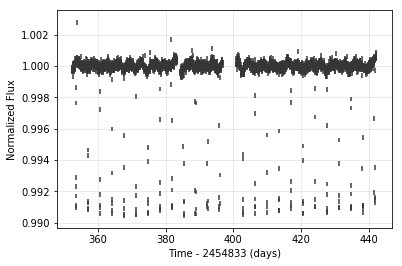

In [7]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

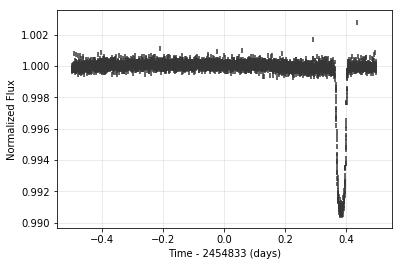

In [8]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

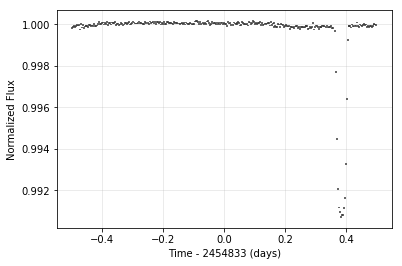

In [9]:
binned_lc = folded_lc.bin()
binned_lc.plot();

Or we can do these all in a single (long) line!

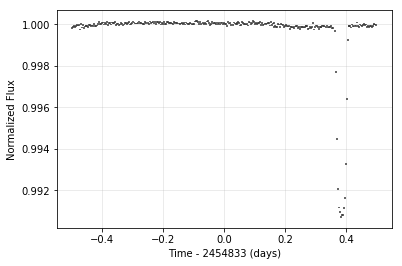

In [10]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin().plot();